In [1]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [2]:
pdb="/Users/Keren/anaconda3/envs/Chem101_S24/ABL1data/ABL1.pdb"
trajectory="/Users/Keren/anaconda3/envs/Chem101_S24/ABL1data/ABL1.xtc"
outdir='/Users/Keren/anaconda3/envs/Chem101_S24/ABL1data/outdir/'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: /Users/Keren/anaconda3/envs/Chem101_S24/ABL1data/outdir/
pdb: /Users/Keren/anaconda3/envs/Chem101_S24/ABL1data/ABL1.pdb
trjaectory: /Users/Keren/anaconda3/envs/Chem101_S24/ABL1data/ABL1.xtc


In [3]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [4]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [5]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [6]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [7]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

In [8]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and coil residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
coil_res=np.where(dssp_frame[:,1]=='C')
print('helical residues:',dssp_frame[helix_res])
print('coil residues:',dssp_frame[coil_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

(350.0, 400.0)

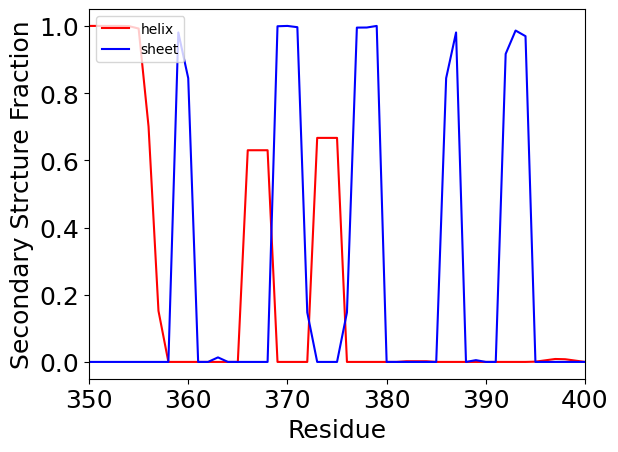

In [9]:
#code for plotting the population of simplified secondary structure
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(350,400)


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

(242.0, 450.0)

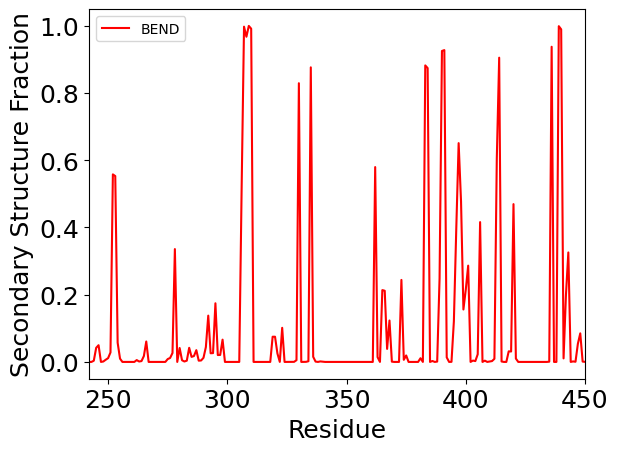

In [252]:
##HW1a
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

dssp_full=md.compute_dssp(trj,simplified=False)

#Isolate the population of S from the full dssp
dsspS=np.copy(dssp_full)
dsspS[dsspS!='S']=0
dsspS[dsspS=='S']=1
dsspS=dsspS.astype(int)
TotalS=np.sum(dsspS,axis=1)

#calculate the column-wise mean by adding elements in each column and dividing by the number of frames
Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS)

#plot the population of S
plt.plot(residue_num,Sprop,c='r',label='BEND')
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Structure Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(242,450)


#HW1 - Representative picture of S secondary structure looking at resid 440 in frame 1
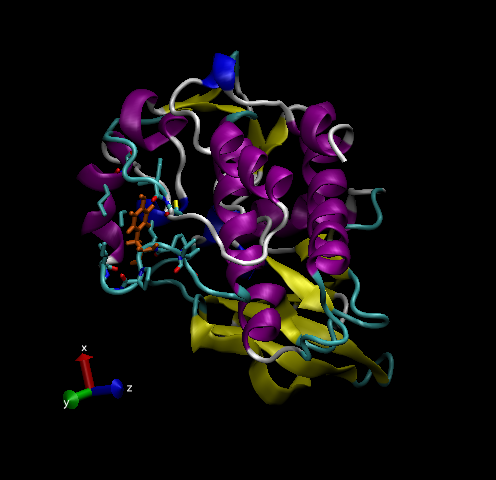

***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

SS: H [281 282 283 324 325 326 327 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 410 411 422 423 424 425 426 427 428 429
 430 431 432 433 466 467 468 469 470 471 472 473 474 475 486 487 488 489]
SS: B [298]
SS: E [246 247 248 249 255 256 257 258 259 260 261 266 267 268 269 270 271 272
 301 302 303 304 313 314 315 369 370 371 377 378 379 392 393 394 415 416
 417]
SS: G []
SS: I []
SS: T [262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]
SS: S [307 308 309 310 390 391 414 436 439 440 478 479 483]
SS:  []


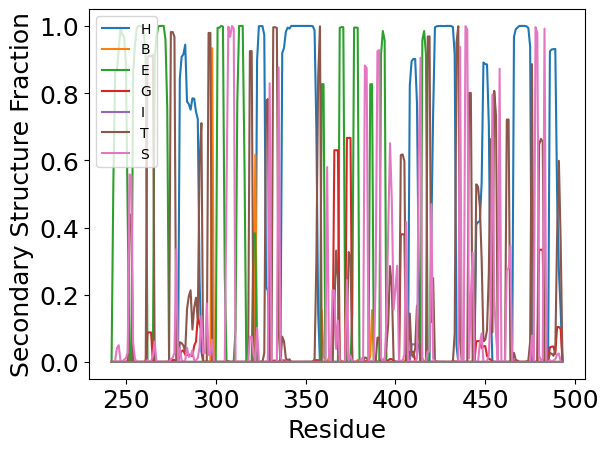

In [253]:
##HW1b
#### Challenge Problem 
#Write a Function to Compute the Population of Any Secondary Structure Type
#### Write a loop to plot all populations
#### Write code to output the residue numbers of every residue with > 90% each SS type
#HW2a
dssp_full=md.compute_dssp(trj,simplified=False)
def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0
 dsspS[dsspS==type]=1
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1)
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS)
 return Sprop
for t in ['H','B','E','G','I','T','S','']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Structure Fraction', size=18)
plt.tick_params(labelsize=18)


***HOMEWORK Problem 2***

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

SS: H [280 281 282 283 284 285 286 287 288 289 290 291 292 323 324 325 326 327
 328 329 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 366 367 368 373 374 375 403 404 405 408 409 410 411
 412 413 420 421 422 423 424 425 426 427 428 429 430 431 432 433 445 446
 447 448 449 450 451 452 453 466 467 468 469 470 471 472 473 474 475 480
 481 482 486 487 488 489 490 491 492]
SS: E [243 244 245 246 247 248 249 250 251 254 255 256 257 258 259 260 261 266
 267 268 269 270 271 272 273 298 301 302 303 304 305 312 313 314 315 316
 321 322 359 360 369 370 371 372 376 377 378 379 386 387 392 393 394 415
 416 417]
SS: C [242 243 244 245 250 251 252 253 254 262 263 264 265 273 274 275 276 277
 278 279 280 284 285 286 287 288 289 290 291 292 293 294 295 296 297 299
 300 305 306 307 308 309 310 311 312 316 317 318 319 320 321 323 328 329
 330 331 332 333 334 335 336 356 357 358 360 361 362 363 364 365 366 367
 368 372 373 374 375 376 380 381 382 383 384 385 386 388 3

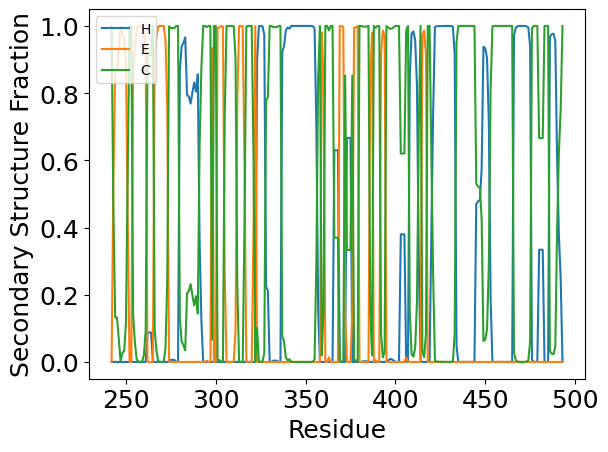

In [12]:
#HW2a
dssp_full=md.compute_dssp(trj,simplified=True)
def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0
 dsspS[dsspS==type]=1
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1)
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS)
 return Sprop
for t in ['H','E','C']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.10)])
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Structure Fraction', size=18)
plt.tick_params(labelsize=18)

SS: H [280 281 282 283 284 285 286 287 288 289 290 291 292 323 324 325 326 327
 328 329 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 366 367 368 373 374 375 403 404 405 408 409 410 411
 412 413 420 421 422 423 424 425 426 427 428 429 430 431 432 433 445 446
 447 448 449 450 451 452 453 466 467 468 469 470 471 472 473 474 475 480
 481 482 486 487 488 489 490 491 492]
SS: E [243 244 245 246 247 248 249 250 251 254 255 256 257 258 259 260 261 266
 267 268 269 270 271 272 273 298 301 302 303 304 305 312 313 314 315 316
 321 322 359 360 369 370 371 372 376 377 378 379 386 387 392 393 394 415
 416 417]
SS: C [242 243 244 245 250 251 252 253 254 262 263 264 265 273 274 275 276 277
 278 279 280 284 285 286 287 288 289 290 291 292 293 294 295 296 297 299
 300 305 306 307 308 309 310 311 312 316 317 318 319 320 321 323 328 329
 330 331 332 333 334 335 336 356 357 358 360 361 362 363 364 365 366 367
 368 372 373 374 375 376 380 381 382 383 384 385 386 388 3

(440.0, 450.0)

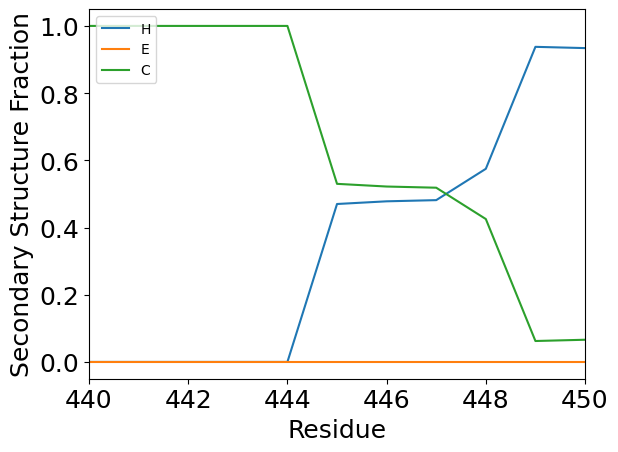

In [248]:
#hw2b
dssp_full=md.compute_dssp(trj,simplified=True)
def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0
 dsspS[dsspS==type]=1
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1)
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS)
 return Sprop
for t in ['H','E','C']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.10)])
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Structure Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(440,450)

In [257]:
#HW2c - chose residue 446 a little under 50% helix and a little over 50% coil
#Find all the frames where a given residue is H or C
residue_number=446
array_index=residue_number-242
print(np.asarray(residue_num)[array_index])
helix_frames=np.where(dssp[:,array_index]=='H')
coil_frames=np.where(dssp[:,array_index]=='C')

print("Residue %s"%np.asarray(residue_num)[array_index])
print("helix_frames:",helix_frames)
print("coil_frames:",coil_frames)

446
Residue 446
helix_frames: (array([   2,    3,    6, ..., 3990, 3997, 3999], dtype=int64),)
coil_frames: (array([   0,    1,    4, ..., 3995, 3996, 3998], dtype=int64),)


#HWK 2d - representative snapshots to illustrate the 2 conformations
#Helix frame 6
![Helix frame 6.bmp](attachment:9bdc64b9-2c5b-44d0-bd71-9538b7de9c96.bmp)

## coil frame 4
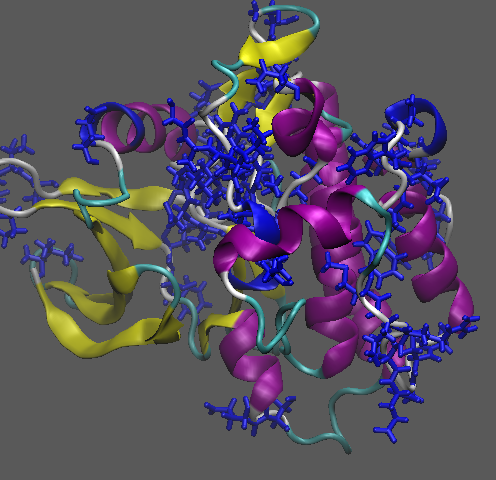

In [238]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [239]:
np.shape(phis[:,0])

(4000,)

In [51]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [19]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

In [96]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




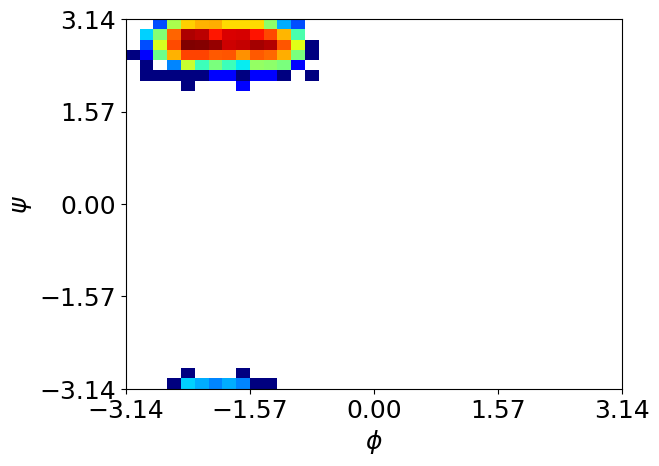

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


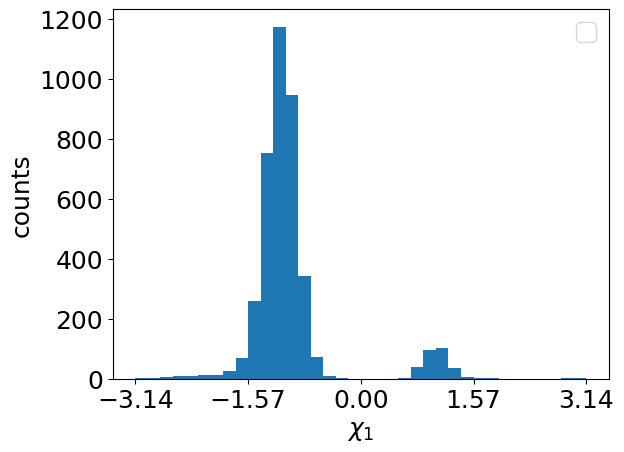

<Figure size 640x480 with 0 Axes>

In [256]:
plot_phipsi(308)
plt.clf()
plot_chi(308)

In [38]:
#Lets Visualize Some Rotamers
#Lets Find all the VAL residues and plot thier X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
VAL_indices=np.where(resnames=='VAL')
VAL_resnums=resnums[VAL_indices]
VAL_resnums

array([256, 260, 268, 270, 280, 289, 299, 304, 335, 338, 339, 371, 377,
       379, 422, 427, 448, 468])

Residue 256


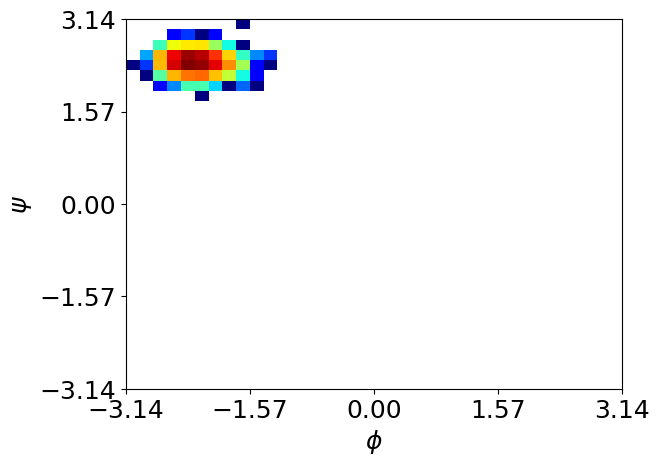

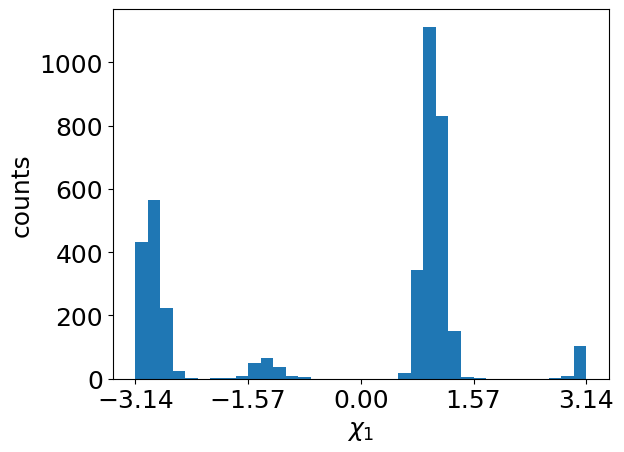

Residue 260


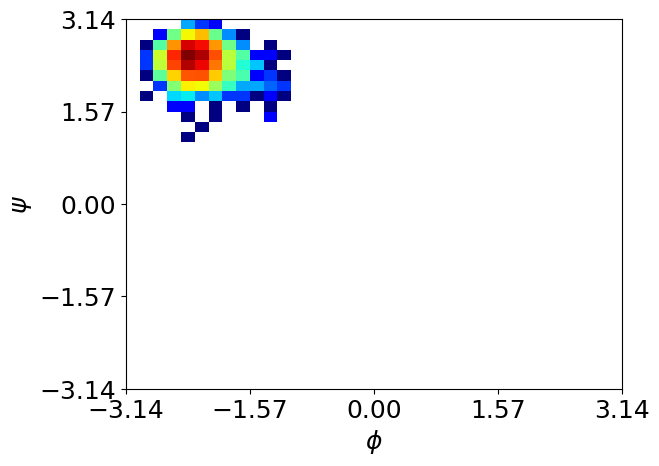

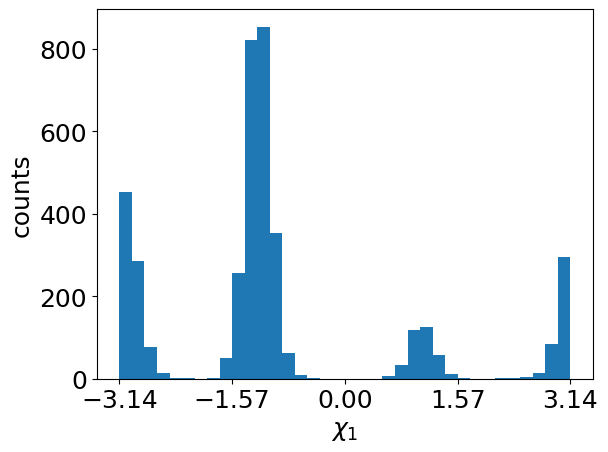

Residue 268


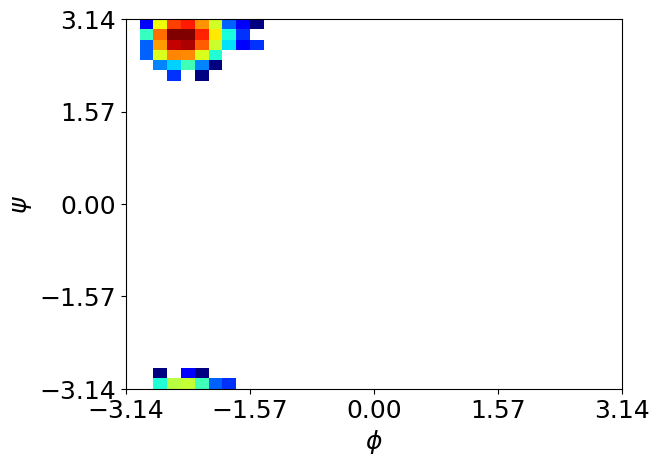

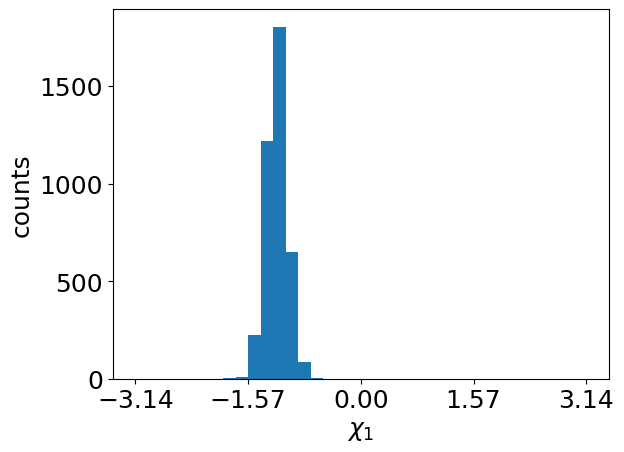

Residue 270


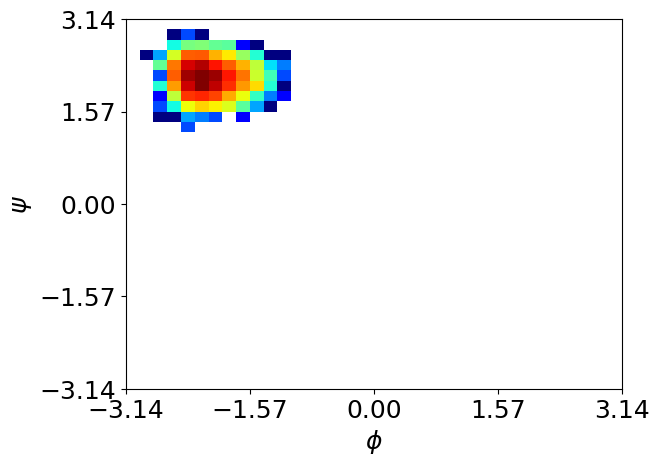

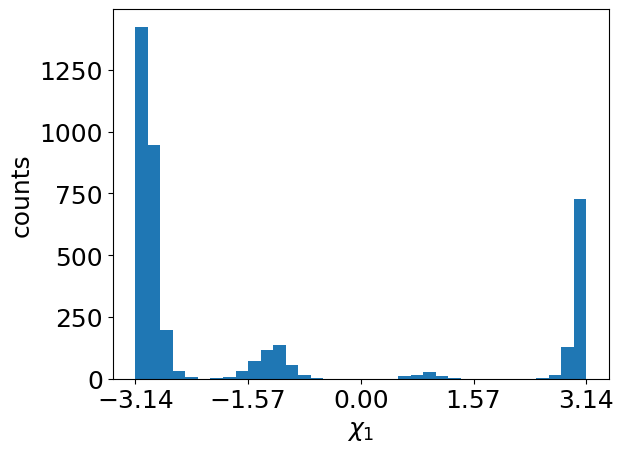

Residue 280


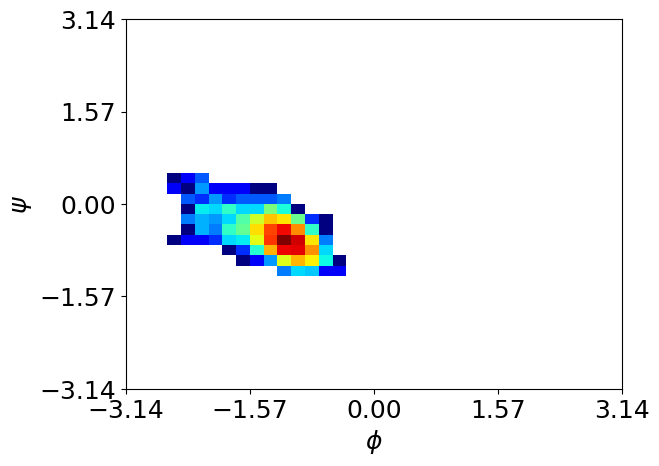

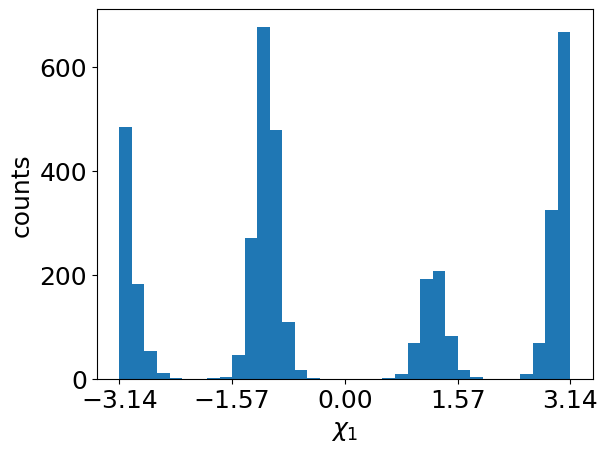

Residue 289


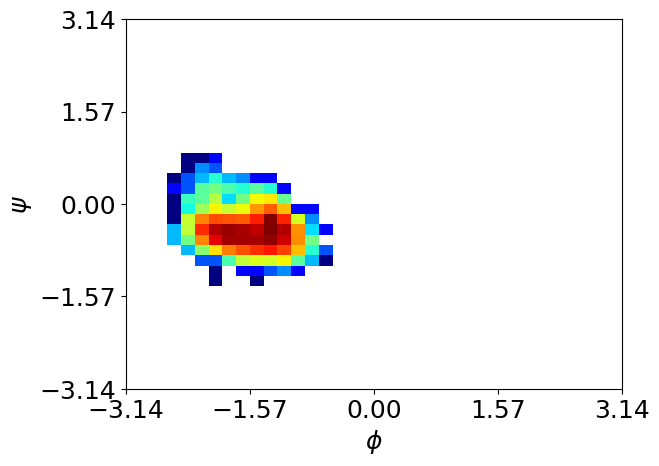

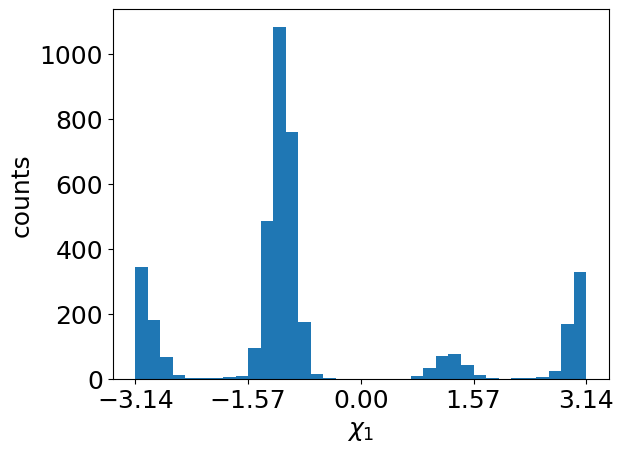

Residue 299


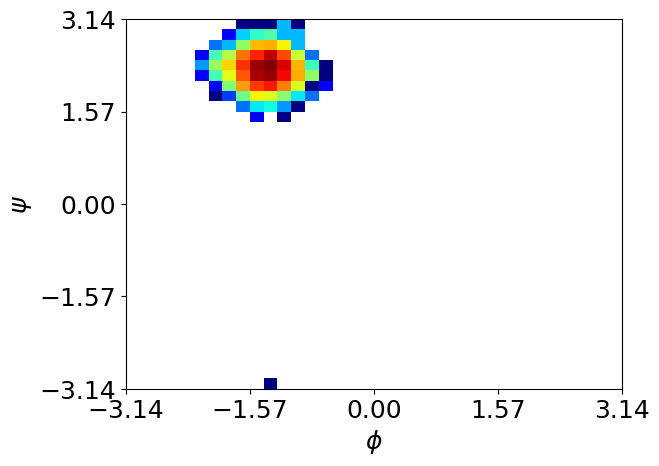

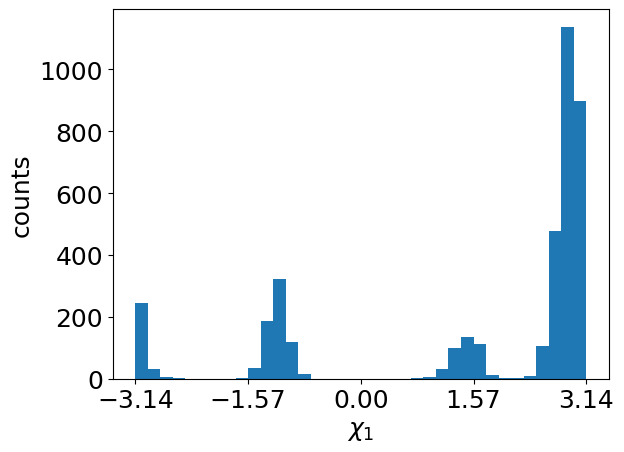

Residue 304


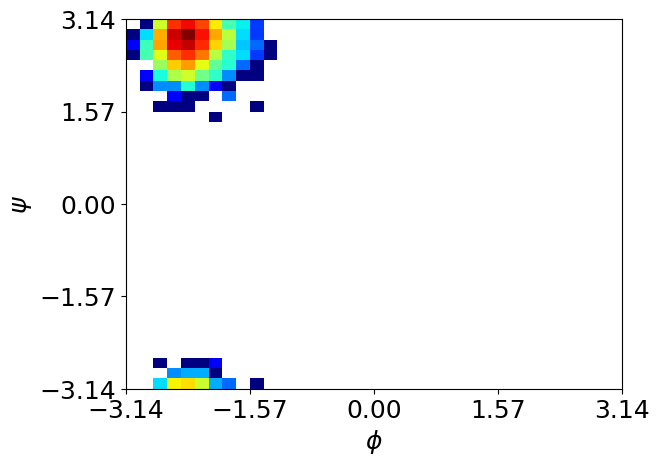

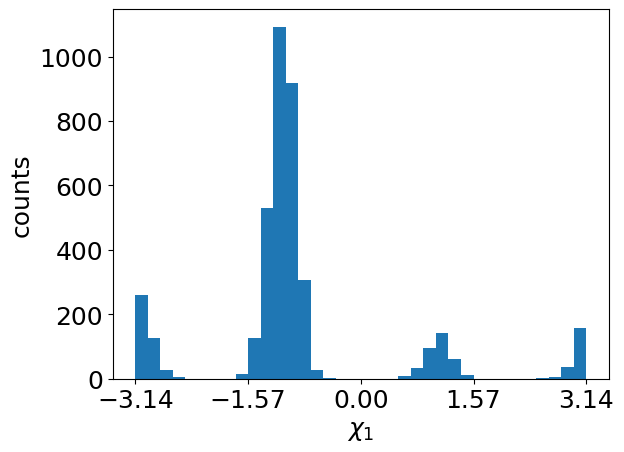

Residue 335


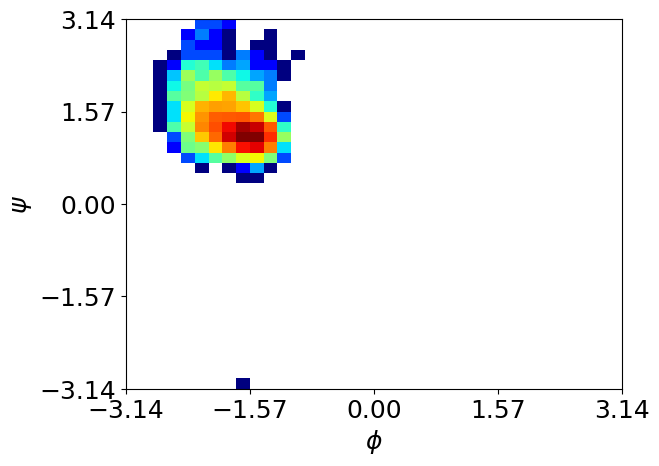

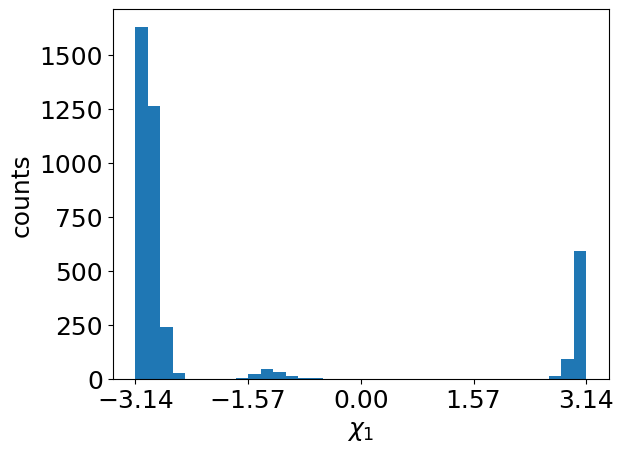

Residue 338


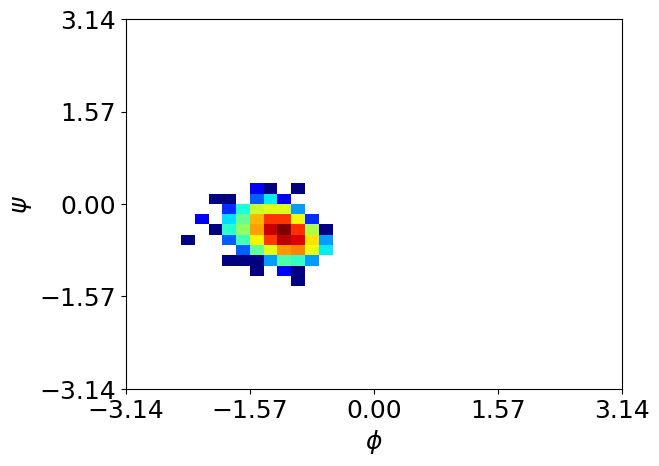

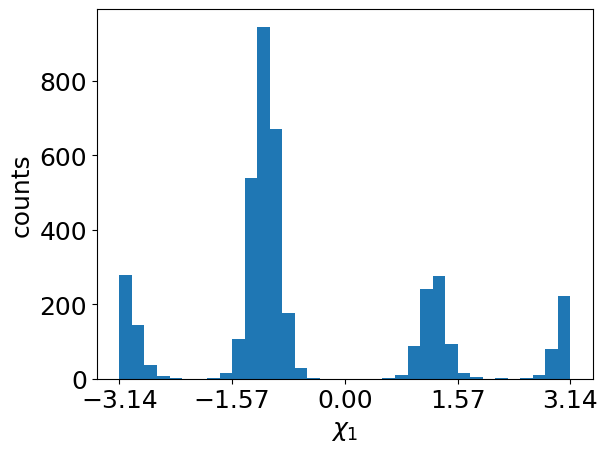

Residue 339


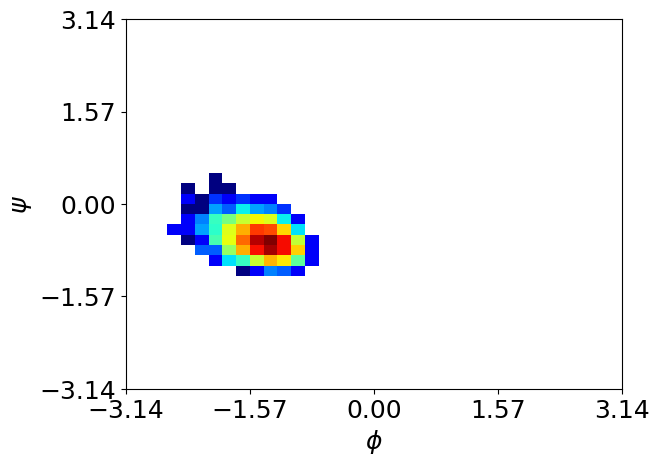

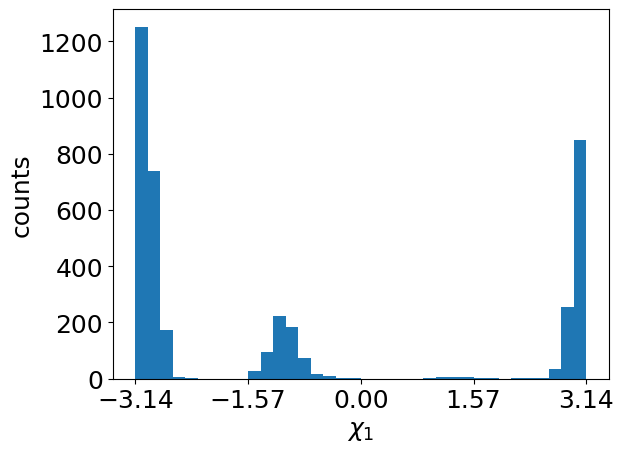

Residue 371


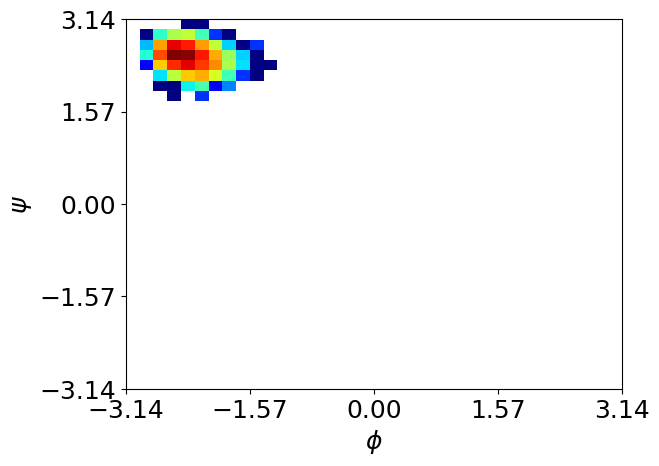

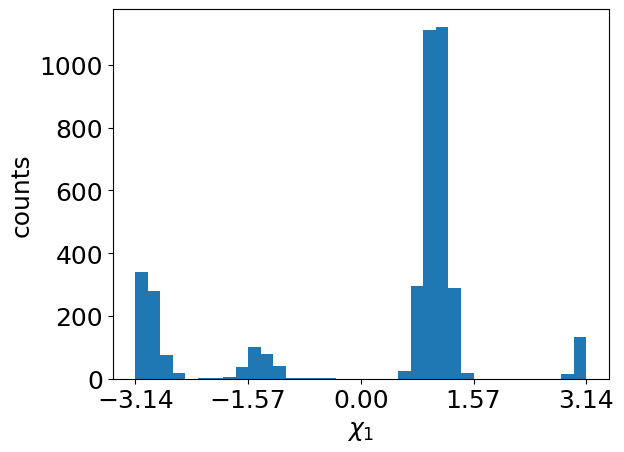

Residue 377


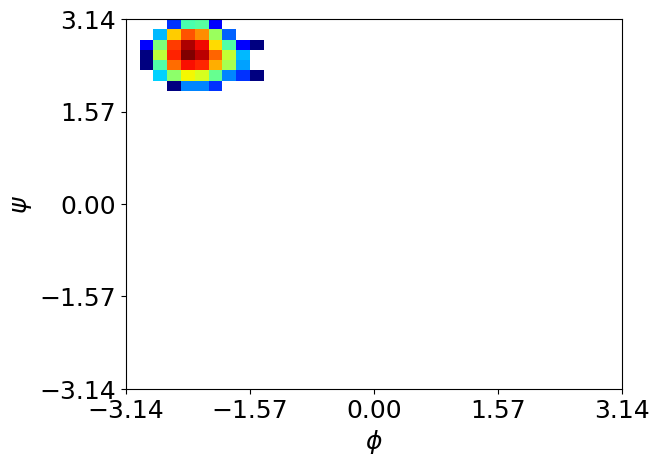

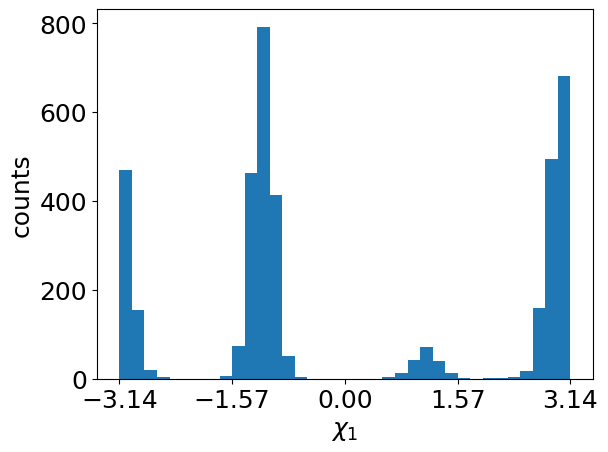

Residue 379


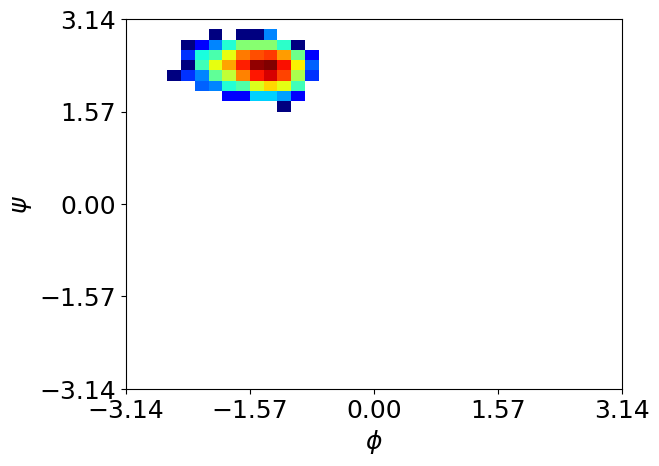

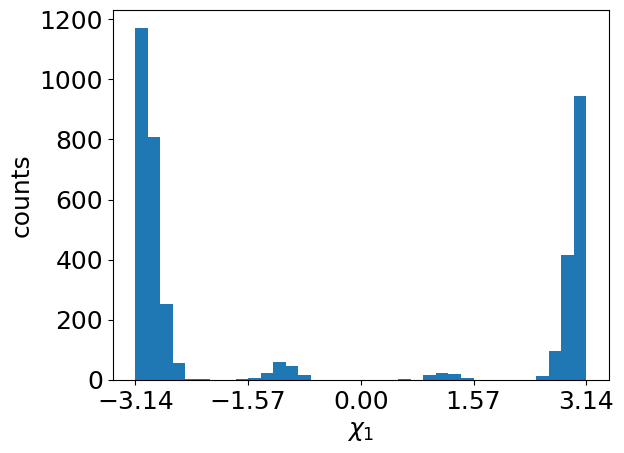

Residue 422


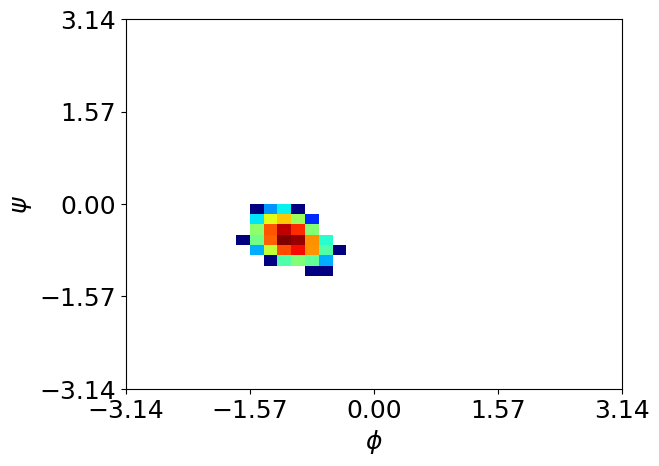

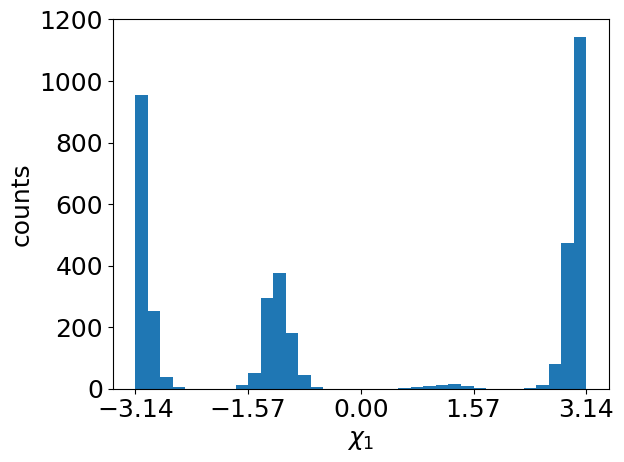

Residue 427


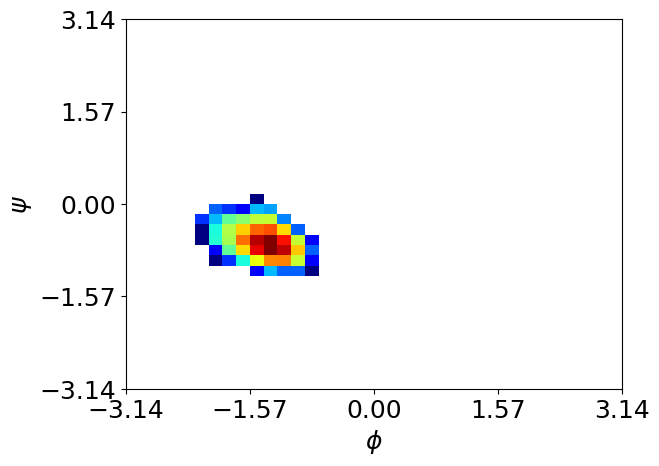

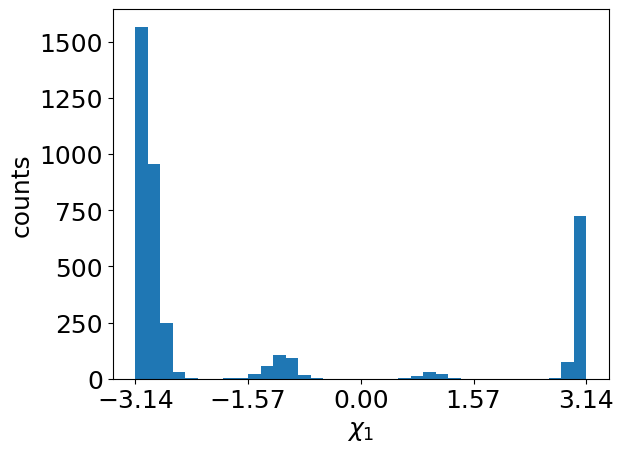

Residue 448


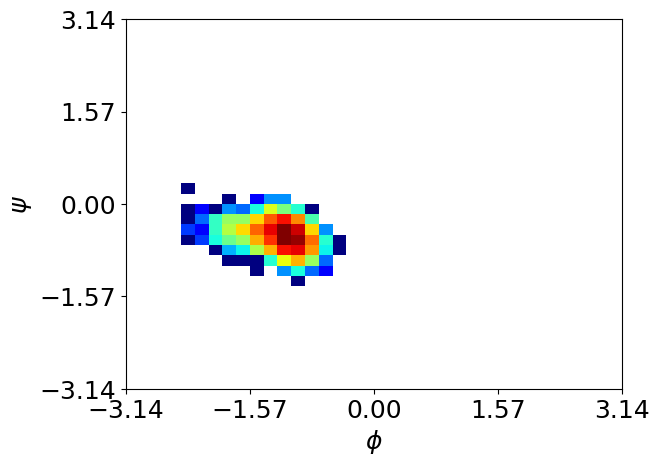

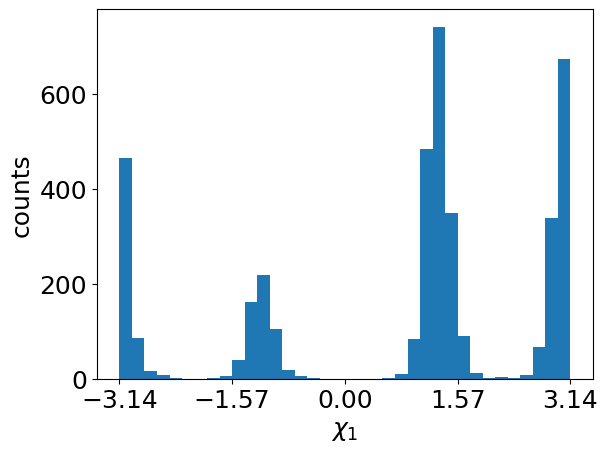

Residue 468


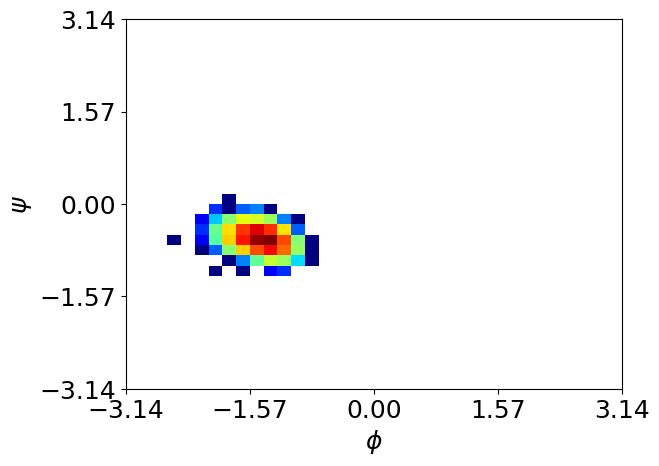

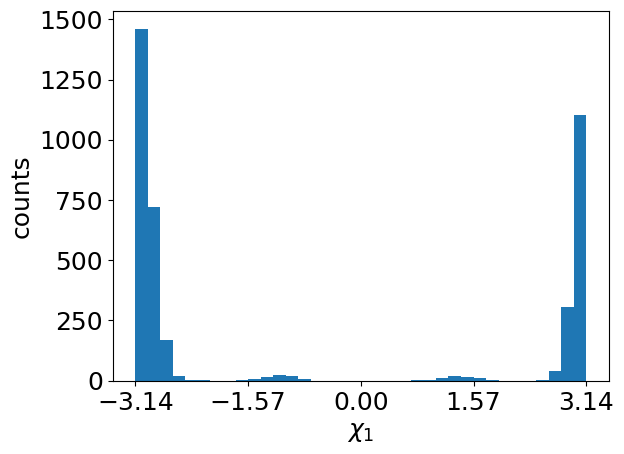

<Figure size 640x480 with 0 Axes>

In [36]:
for i in Val_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



In [236]:
#Lets Visualize Some Rotamers
#Lets Find all the SER residues and plot thier X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
SER_indices=np.where(resnames=='SER')
SER_resnums=resnums[SER_indices]
SER_resnums

array([265, 348, 349, 385, 410, 417, 420, 438, 446, 481, 485])

Residue 265


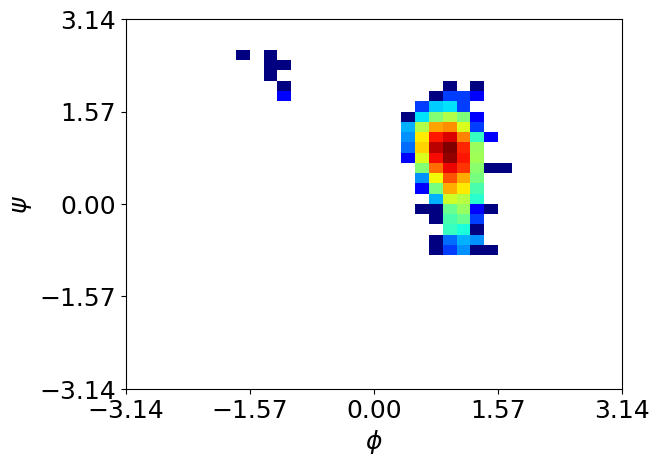

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


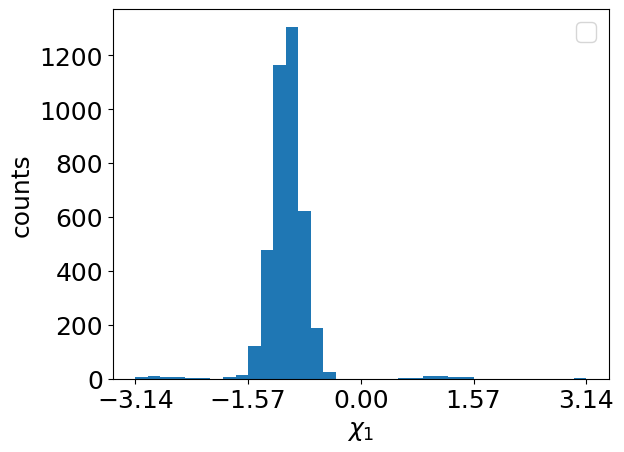

Residue 348


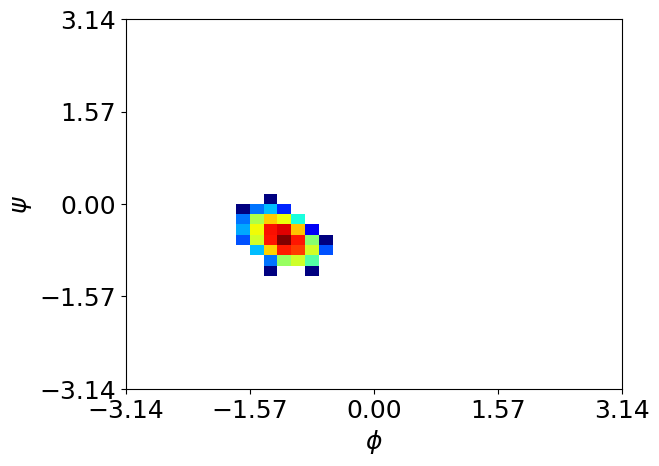

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


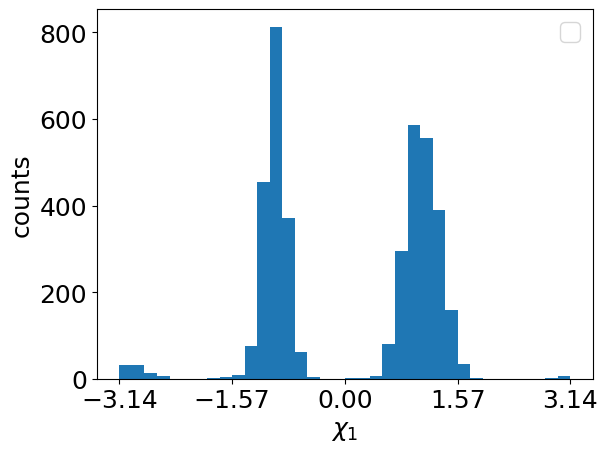

Residue 349


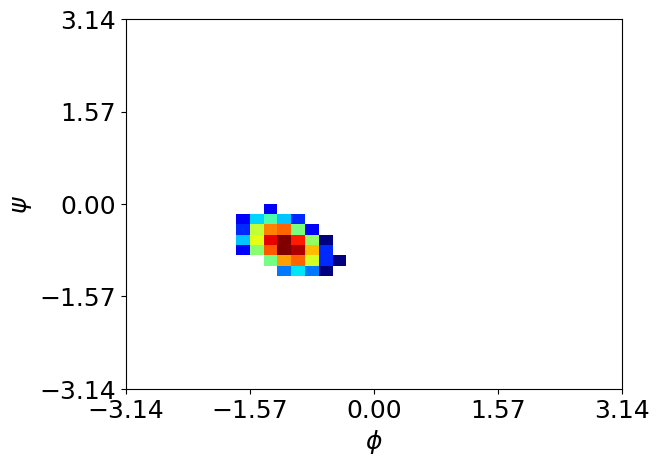

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


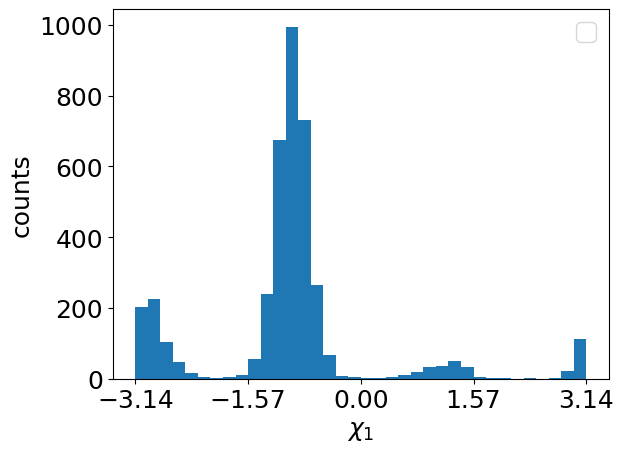

Residue 385


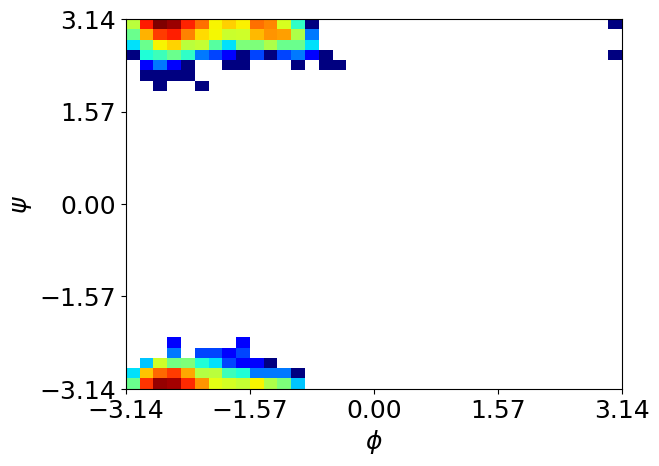

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


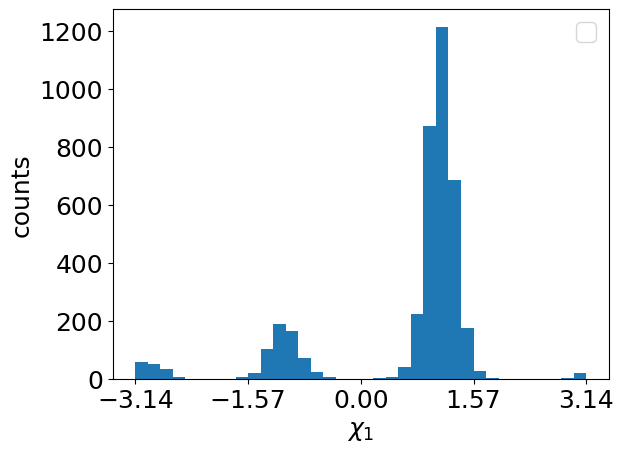

Residue 410


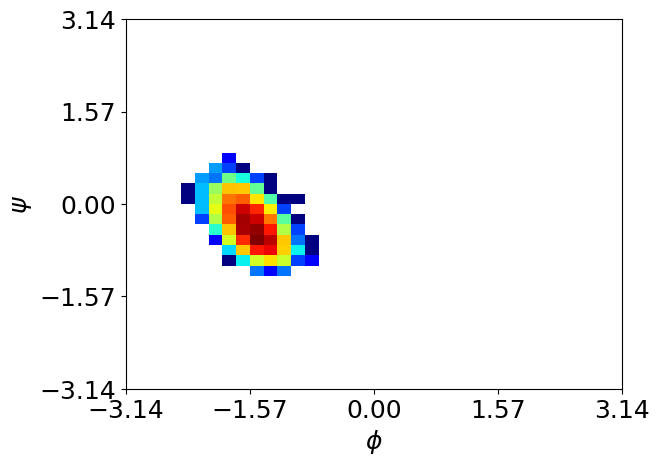

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


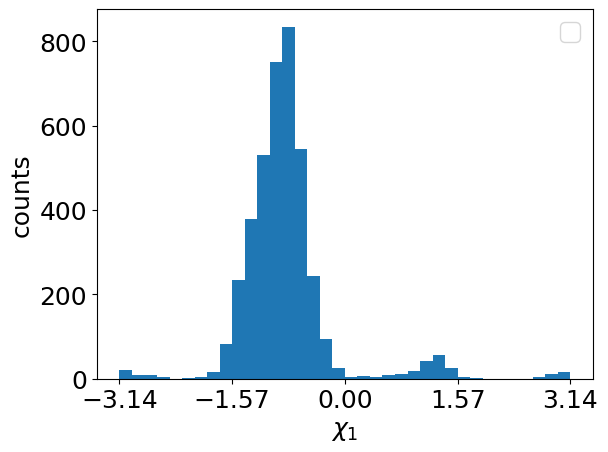

Residue 417


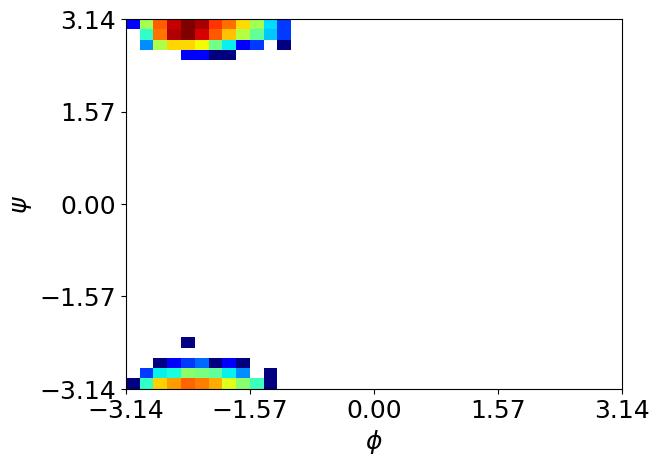

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


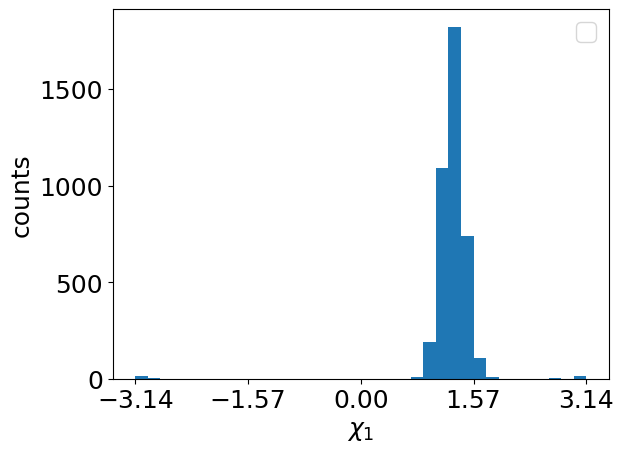

Residue 420


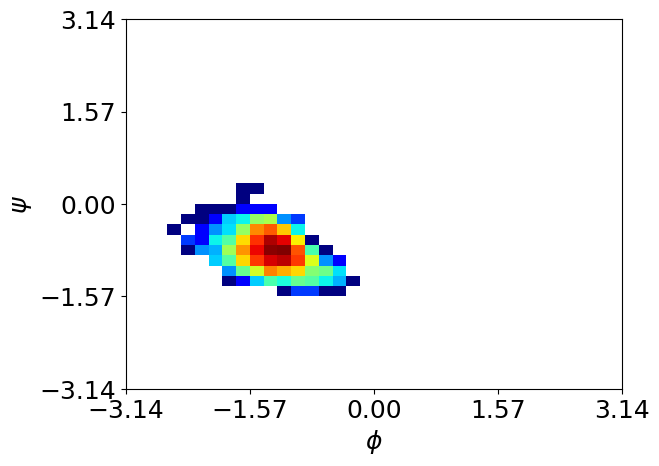

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


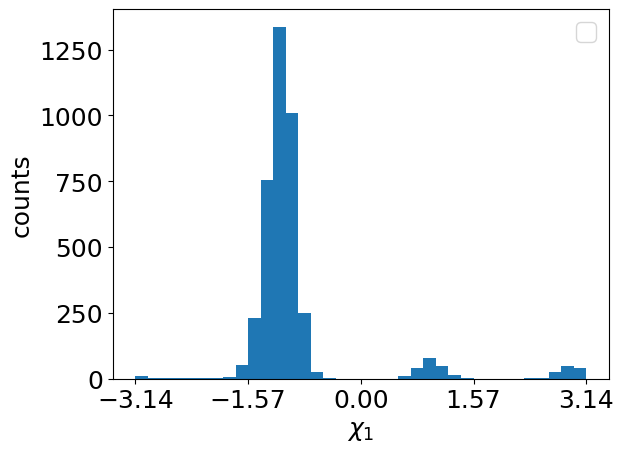

Residue 438


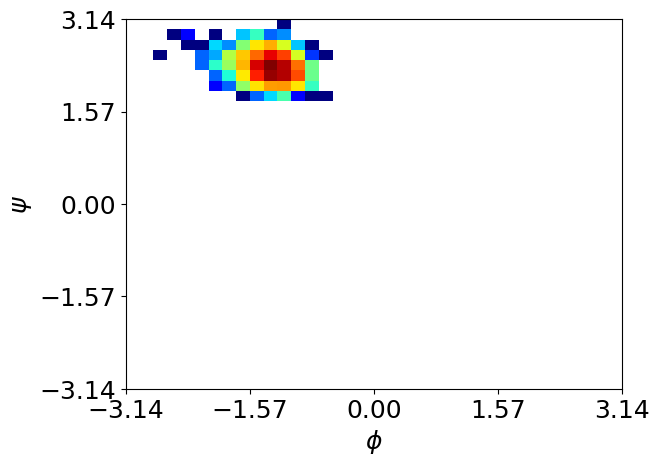

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


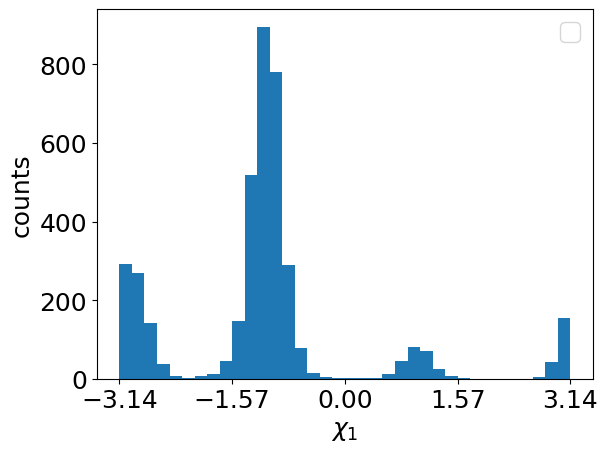

Residue 446


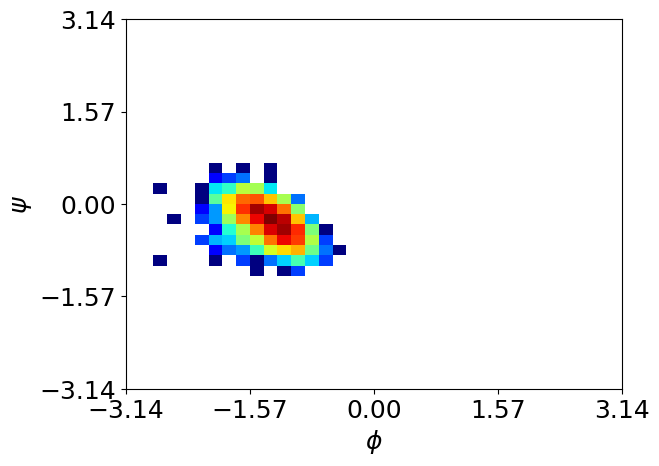

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


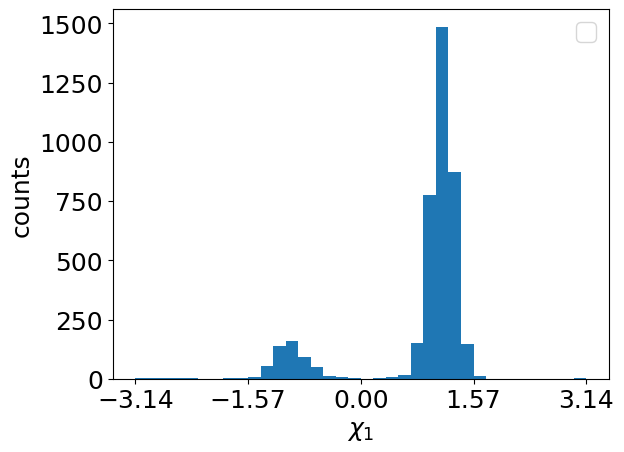

Residue 481


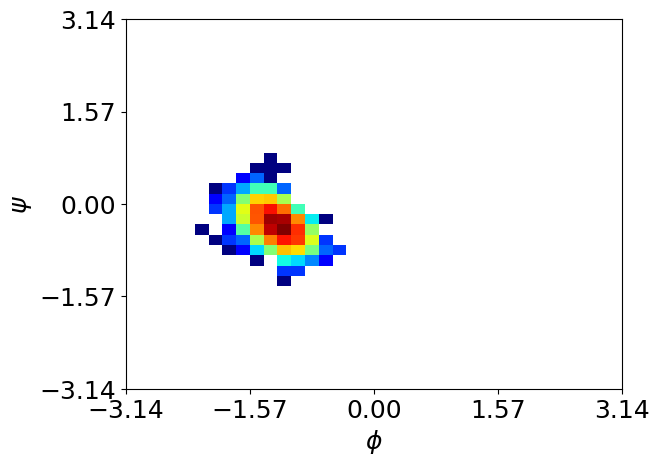

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


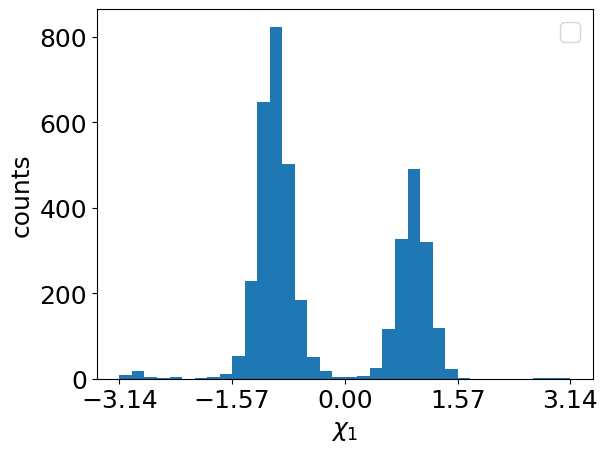

Residue 485


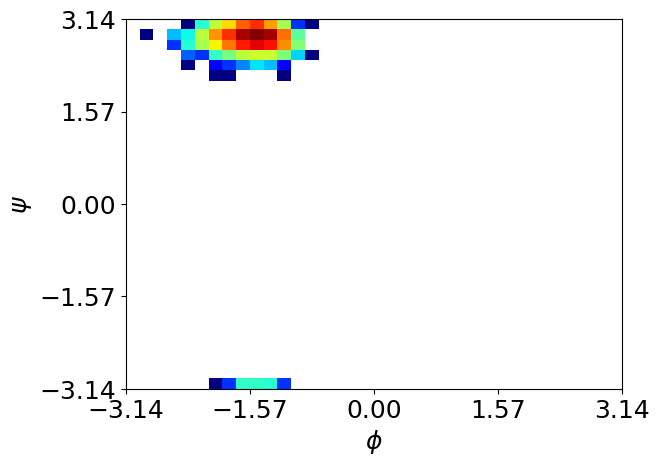

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


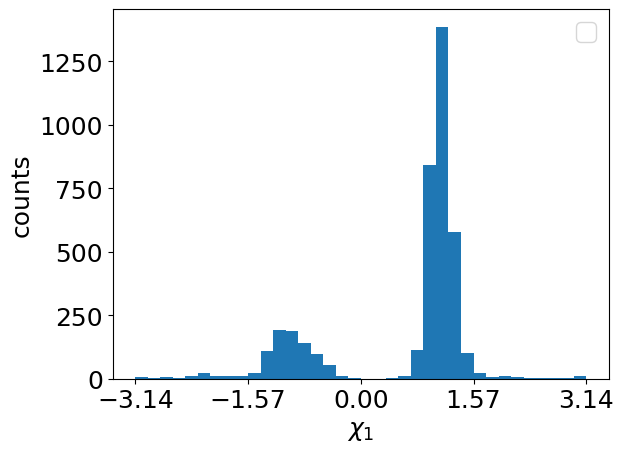

<Figure size 640x480 with 0 Axes>

In [237]:
for i in SER_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

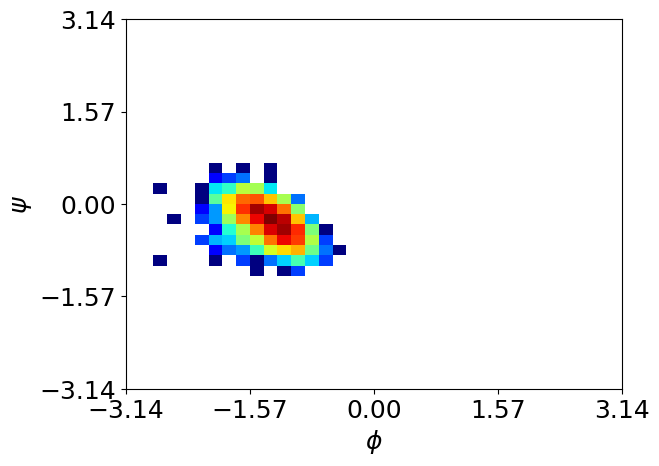

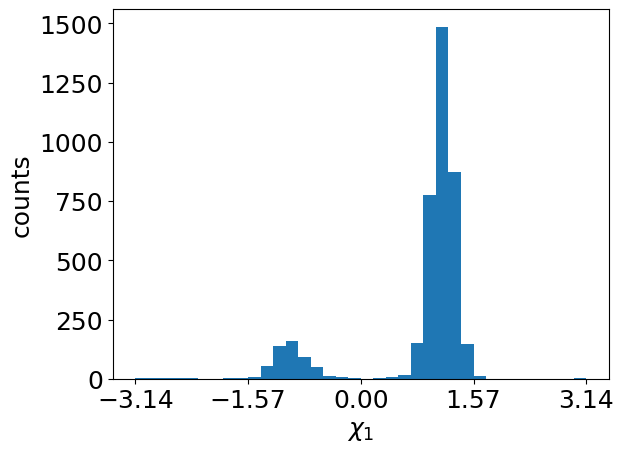

<Figure size 640x480 with 0 Axes>

In [146]:
#HW3
plot_phipsi(446)
plt.clf()
plot_chi(446)

In [232]:
import numpy as np
# Define the residue number of interest
residue_number = 446
# Extract chi1 values for residue 480
chi1_values = dihedral_dict['chi1'].get(residue_number, None)
if chi1_values is not None:
    # Find frames where chi1 is greater than 0
    frames_with_positive_chi1 = np.where(chi1_values >0)
    frames_with_negative_chi1 = np.where(chi1_values < 0)
    # Print or use the indices
    print("Frames where chi1 of residue", residue_number, "is greater than 0:", frames_with_positive_chi1)
    print("Frames where chi1 of residue", residue_number, "is less than 0:", frames_with_negative_chi1)

Frames where chi1 of residue 446 is greater than 0: (array([   5,    6,    7, ..., 3997, 3998, 3999], dtype=int64),)
Frames where chi1 of residue 446 is less than 0: (array([   0,    1,    2,    3,    4,   16,   18,   19,   20,   47,   48,
         49,   69,   70,   71,   72,   73,   88,   92,  105,  106,  107,
        108,  117,  118,  176,  177,  178,  211,  215,  220,  221,  222,
        237,  277,  278,  294,  295,  296,  300,  395,  420,  424,  425,
        427,  441,  444,  461,  462,  482,  483,  513,  514,  529,  556,
        620,  621,  622,  623,  624,  635,  662,  711,  714,  715,  716,
        717,  718,  719,  720,  783,  784,  827,  828,  829,  830,  831,
        832,  833,  834,  849,  850,  851,  852,  864,  893,  899,  900,
        903,  904,  905,  908,  918,  933,  934,  935,  936,  937,  941,
        942,  943,  944,  945,  946,  947,  948,  949,  950,  951,  952,
        953,  954,  955,  956,  957,  958,  959,  960,  970,  971,  980,
       1035, 1036, 1037, 1038,

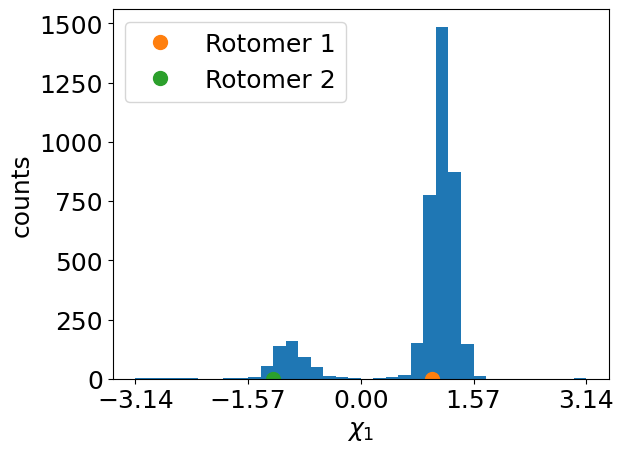

<Figure size 640x480 with 0 Axes>

In [233]:
#Here is the plot of Chi1 (Chi2 as well if it existed for this residue) pulling out specific frames
#1 where rotomer 1 and 4 where rotomer 2 exists
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
# Assuming dihedral_dict is defined
def plot_chi(res, frames_to_highlight=None):
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res], bins=36, range=[-3.14, 3.14])
        plt.xticks([-3.14, -3.14/2, 0, 3.14/2, 3.14], fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
        # Add points for frames_to_highlight
        if frames_to_highlight:
            for idx, frame_num in enumerate(frames_to_highlight, start=1):
                chi1_value = dihedral_dict['chi1'][res][frame_num - 1]  # Adjust frame number to index
                label = f'Rotomer {idx}'
                plt.plot(chi1_value, 0, 'o', markersize=10, label=label)  # Points indicating frame 3 and frame 5
        plt.legend(fontsize=18)
        plt.show()
        plt.clf()
    return
# Plot the chi1 histogram for residue 481 and include points for frames 3 and 5
plot_chi(446, frames_to_highlight=[6, 1])

***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**


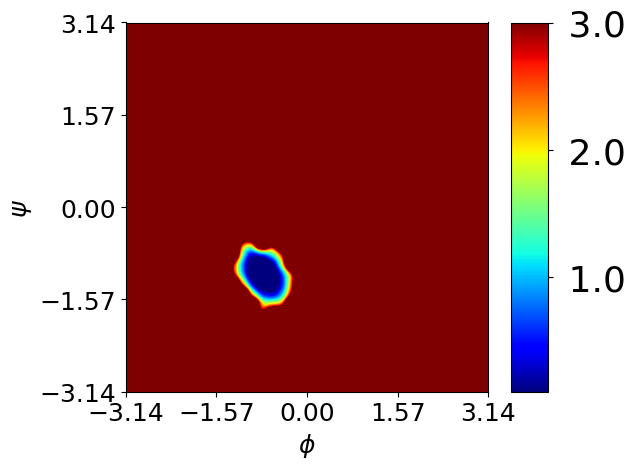

In [27]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(350)

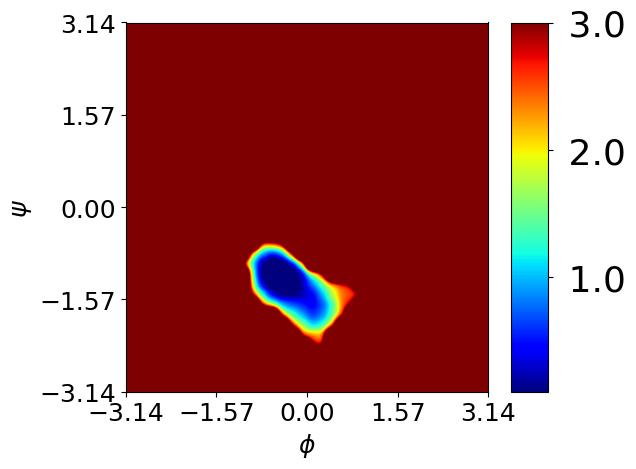

In [28]:
#hw4
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-1.57,0,1.57,3.14],fontsize=35)
 plt.yticks([-3.14,-1.57,0,1.57,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(284)